In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

#import the numpy and pandas packages
import numpy as np
import pandas as pd

#import the matplotlib and seaborn packages
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
#split the data into traing and test data
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.metrics import mean_squared_error
#going to use mean squared errie method
from sklearn.metrics import r2_score

In [6]:
advertising = pd.DataFrame(pd.read_csv('advertising_for_LR.csv'))

In [7]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# **DATA Inspection**

Data inspection refers to process of examining data sets to ensure  are they meet specific quality criteria and identify any patterns,anomalies, or issues that need to be addressed


In [9]:
advertising.shape

(200, 4)

In [10]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# **Data Cleaning**

In [12]:
#cheking null values and present them as a precnatage
advertising.isnull().sum()*100/advertising.shape[0]
#there are no null values in the dataset,hence it is clean

,0
TV,0.0
Radio,0.0
Newspaper,0.0
Sales,0.0


# **Outlier Analysis**

Outliears are data points that differ significantly from other observations in a data set

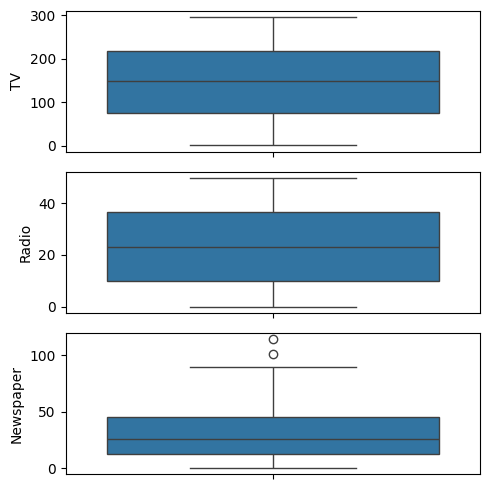

In [21]:
#Outlier Analysis
fig, axs= plt.subplots(3, figsize=(5,5))
sns.boxplot(advertising['TV'], ax=axs[0])
sns.boxplot(advertising['Radio'], ax=axs[1])
sns.boxplot(advertising['Newspaper'], ax=axs[2])
plt.tight_layout()
#automatically adjust the spacing between subplots to ensure that they fit within the figure are and dont't overlap

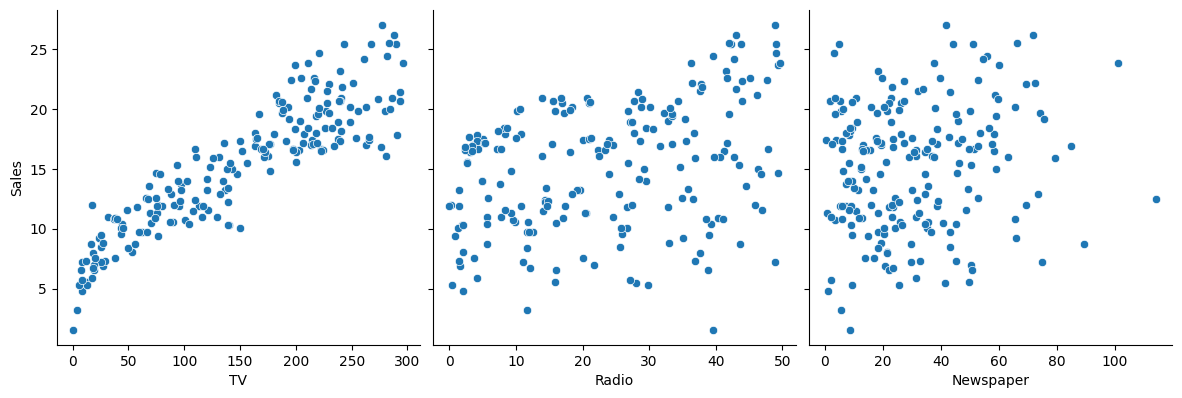

In [29]:
#Let's see how Sales are related with other variables using scatter plot
sns.pairplot(advertising, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [30]:
#x_vars=['TV', 'Radio', 'Newspaper'] :These are the independent variables that will be plotted on the x-asis
#y_vars='Sales' : This is the independent variable that will be plotted on the axis
#height=4:this controls the gheight of the individual plots
#aspect=1:this sets the aspects ratio(width to height) of each subplot

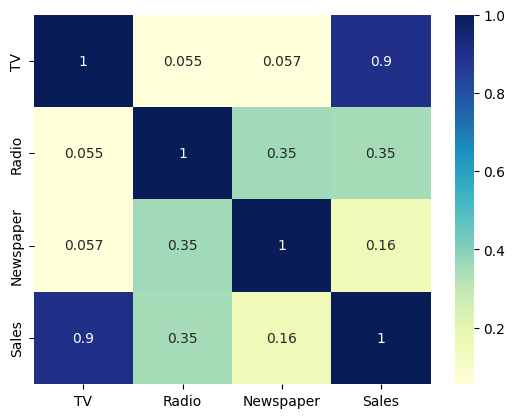

In [35]:
#Let's see the correalation between diffrent varibles
sns.heatmap(advertising.corr(),cmap="YlGnBu", annot=True)
plt.show()


# Selecting data for dependent and independant Varibles

In [41]:
# x=advertising[['TV','Radio','Newspaper']]
# y=advertising['Sales']
x=advertising.iloc[:,:3] #we are selecting upto 3rd column for X.that means column 0,1,2.
y=advertising.iloc[:,3]#we are selecting theh 3rd column ony and all the rows of 3rd column


In [40]:
print(x)
print(y)

        TV  Radio  Newspaper
0    230.1   37.8       69.2
1     44.5   39.3       45.1
2     17.2   45.9       69.3
3    151.5   41.3       58.5
4    180.8   10.8       58.4
..     ...    ...        ...
195   38.2    3.7       13.8
196   94.2    4.9        8.1
197  177.0    9.3        6.4
198  283.6   42.0       66.2
199  232.1    8.6        8.7

[200 rows x 3 columns]
0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64


In [42]:
x=advertising.iloc[:,:3].values
y=advertising.iloc[:,3].values #convert datafrme into an array

In [46]:
x#2D Array

array([[230.1,  37.8,  69.2],
       [ 44.5,  39.3,  45.1],
       [ 17.2,  45.9,  69.3],
       [151.5,  41.3,  58.5],
       [180.8,  10.8,  58.4],
       [  8.7,  48.9,  75. ],
       [ 57.5,  32.8,  23.5],
       [120.2,  19.6,  11.6],
       [  8.6,   2.1,   1. ],
       [199.8,   2.6,  21.2],
       [ 66.1,   5.8,  24.2],
       [214.7,  24. ,   4. ],
       [ 23.8,  35.1,  65.9],
       [ 97.5,   7.6,   7.2],
       [204.1,  32.9,  46. ],
       [195.4,  47.7,  52.9],
       [ 67.8,  36.6, 114. ],
       [281.4,  39.6,  55.8],
       [ 69.2,  20.5,  18.3],
       [147.3,  23.9,  19.1],
       [218.4,  27.7,  53.4],
       [237.4,   5.1,  23.5],
       [ 13.2,  15.9,  49.6],
       [228.3,  16.9,  26.2],
       [ 62.3,  12.6,  18.3],
       [262.9,   3.5,  19.5],
       [142.9,  29.3,  12.6],
       [240.1,  16.7,  22.9],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [292.9,  28.3,  43.2],
       [112.9,  17.4,  38.6],
       [ 97.2,   1.5,  30. ],
       [26

In [47]:
y #1D array

array([22.1, 10.4, 12. , 16.5, 17.9,  7.2, 11.8, 13.2,  4.8, 15.6, 12.6,
       17.4,  9.2, 13.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. , 17.5,
        5.6, 20.5,  9.7, 17. , 15. , 20.9, 18.9, 10.5, 21.4, 11.9, 13.2,
       17.4, 11.9, 17.8, 25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7, 17.9,
        8.5, 16.1, 10.6, 23.2, 19.8,  9.7, 16.4, 10.7, 22.6, 21.2, 20.2,
       23.7,  5.5, 13.2, 23.8, 18.4,  8.1, 24.2, 20.7, 14. , 16. , 11.3,
       11. , 13.4, 18.9, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 11. , 11.8, 17.3, 11.3, 13.6, 21.7, 20.2, 12. , 16. ,
       12.9, 16.7, 14. ,  7.3, 19.4, 22.2, 11.5, 16.9, 16.7, 20.5, 25.4,
       17.2, 16.7, 23.8, 19.8, 19.7, 20.7, 15. ,  7.2, 12. ,  5.3, 19.8,
       18.4, 21.8, 17.1, 20.9, 14.6, 12.6, 12.2,  9.4, 15.9,  6.6, 15.5,
        7. , 16.6, 15.2, 19.7, 10.6,  6.6, 11.9, 24.7,  9.7,  1.6, 17.7,
        5.7, 19.6, 10.8, 11.6,  9.5, 20.8,  9.6, 20.7, 10.9, 19.2, 20.1,
       10.4, 12.3, 10.3, 18.2, 25.4, 10.9, 10.1, 16

In [50]:
train_test_split(x,y,train_size=0.8, test_size= 0.2) #validation set approach

[array([[134.3,   4.9,   9.3],
        [ 93.9,  43.5,  50.5],
        [213.5,  43. ,  33.8],
        [248.4,  30.2,  20.3],
        [  8.7,  48.9,  75. ],
        [ 48.3,  47. ,   8.5],
        [205. ,  45.1,  19.6],
        [ 43.1,  26.7,  35.1],
        [116. ,   7.7,  23.1],
        [  7.8,  38.9,  50.6],
        [222.4,   4.3,  49.8],
        [147.3,  23.9,  19.1],
        [265.2,   2.9,  43. ],
        [220.5,  33.2,  37.9],
        [109.8,  14.3,  31.7],
        [280.2,  10.1,  21.4],
        [ 76.4,  26.7,  22.3],
        [240.1,  16.7,  22.9],
        [199.1,  30.6,  38.7],
        [204.1,  32.9,  46. ],
        [ 80.2,   0. ,   9.2],
        [ 69. ,   9.3,   0.9],
        [ 62.3,  12.6,  18.3],
        [  4.1,  11.6,   5.7],
        [262.9,   3.5,  19.5],
        [ 73.4,  17. ,  12.9],
        [165.6,  10. ,  17.6],
        [177. ,  33.4,  38.7],
        [ 17.2,  45.9,  69.3],
        [229.5,  32.3,  74.2],
        [151.5,  41.3,  58.5],
        [ 89.7,   9.9,  35.7],
        

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size= 0.2)
#split data into train & test data

In [52]:
x_train

array([[110.7,  40.6,  63.2],
       [165.6,  10. ,  17.6],
       [ 38. ,  40.3,  11.9],
       [184.9,  21. ,  22. ],
       [ 18.7,  12.1,  23.4],
       [ 28.6,   1.5,  33. ],
       [ 88.3,  25.5,  73.4],
       [147.3,  23.9,  19.1],
       [ 78.2,  46.8,  34.5],
       [ 36.9,  38.6,  65.6],
       [218.5,   5.4,  27.4],
       [  5.4,  29.9,   9.4],
       [139.5,   2.1,  26.6],
       [253.8,  21.3,  30. ],
       [229.5,  32.3,  74.2],
       [ 94.2,   4.9,   8.1],
       [149.7,  35.6,   6. ],
       [120.5,  28.5,  14.2],
       [187.9,  17.2,  17.9],
       [ 13.1,   0.4,  25.6],
       [ 19.6,  20.1,  17. ],
       [199.8,   3.1,  34.6],
       [ 17.2,   4.1,  31.6],
       [135.2,  41.7,  45.9],
       [191.1,  28.7,  18.2],
       [120.2,  19.6,  11.6],
       [ 75.3,  20.3,  32.5],
       [296.4,  36.3, 100.9],
       [206.9,   8.4,  26.4],
       [219.8,  33.5,  45.1],
       [ 80.2,   0. ,   9.2],
       [213.5,  43. ,  33.8],
       [210.7,  29.5,   9.3],
       [19

In [53]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8, test_size= 0.2, random_state=100)
#split dat ainto train and test data
#random state decide you will get the same values

In [54]:
#take a look at the train dataset
x_train

array([[215.4,  23.6,  57.6],
       [175.7,  15.4,   2.4],
       [164.5,  20.9,  47.4],
       [218.5,   5.4,  27.4],
       [120.2,  19.6,  11.6],
       [ 89.7,   9.9,  35.7],
       [ 16.9,  43.7,  89.4],
       [248.8,  27.1,  22.9],
       [ 70.6,  16. ,  40.8],
       [ 38.2,   3.7,  13.8],
       [202.5,  22.3,  31.6],
       [171.3,  39.7,  37.7],
       [ 75.1,  35. ,  52.7],
       [131.1,  42.8,  28.9],
       [210.7,  29.5,   9.3],
       [ 44.5,  39.3,  45.1],
       [ 17.2,   4.1,  31.6],
       [ 25.6,  39. ,   9.3],
       [197.6,  23.3,  14.2],
       [ 85.7,  35.8,  49.3],
       [213.4,  24.6,  13.1],
       [151.5,  41.3,  58.5],
       [205. ,  45.1,  19.6],
       [142.9,  29.3,  12.6],
       [134.3,   4.9,   9.3],
       [ 80.2,   0. ,   9.2],
       [239.8,   4.1,  36.9],
       [ 88.3,  25.5,  73.4],
       [ 19.4,  16. ,  22.3],
       [225.8,   8.2,  56.5],
       [136.2,  19.2,  16.6],
       [ 25.1,  25.7,  43.3],
       [ 38. ,  40.3,  11.9],
       [17

In [55]:
x_test

array([[  7.8,  38.9,  50.6],
       [238.2,  34.3,   5.3],
       [135.2,  41.7,  45.9],
       [217.7,  33.5,  59. ],
       [241.7,  38. ,  23.2],
       [206.8,   5.2,  19.4],
       [139.2,  14.3,  25.6],
       [197.6,   3.5,   5.9],
       [216.4,  41.7,  39.6],
       [216.8,  43.9,  27.2],
       [117.2,  14.7,   5.4],
       [229.5,  32.3,  74.2],
       [ 56.2,   5.7,  29.7],
       [187.8,  21.1,   9.5],
       [ 87.2,  11.8,  25.9],
       [ 94.2,   4.9,   8.1],
       [149.7,  35.6,   6. ],
       [170.2,   7.8,  35.2],
       [163.5,  36.8,   7.4],
       [112.9,  17.4,  38.6],
       [214.7,  24. ,   4. ],
       [129.4,   5.7,  31.3],
       [195.4,  47.7,  52.9],
       [177. ,  33.4,  38.7],
       [184.9,  21. ,  22. ],
       [220.3,  49. ,   3.2],
       [219.8,  33.5,  45.1],
       [ 75.3,  20.3,  32.5],
       [184.9,  43.9,   1.7],
       [123.1,  34.6,  12.4],
       [ 68.4,  44.5,  35.6],
       [ 69. ,   9.3,   0.9],
       [121. ,   8.4,  48.7],
       [18

In [56]:
model=LinearRegression()#import linear regression for the model

In [60]:
model.fit(x_train,y_train) #fit(allocate data) the linear regression

LinearRegression()

In [61]:
model.intercept_ #getting the intercept of the model

4.419176628968954

In [62]:
model.coef_ #getting the gradient values(slope)

array([0.05373662, 0.1061416 , 0.00542157])

In [63]:
y_pred=model.predict(x_test) #predict the model

In [64]:
print(y_pred)

[ 9.24156185 20.88863168 16.35932288 19.99325582 21.56647985 16.18902526
 13.55593173 15.44101643 20.68858089 20.87635961 12.30666696 20.5823859
  8.2052026  16.8020073  10.49789975 10.04517517 16.27471961 14.58389375
 17.15124514 12.54217786 18.5255145  12.14739801 20.26906823 17.68550321
 16.70332653 21.47564231 20.03074293 10.79641986 19.02391131 14.77388184
 13.01107071  9.11899998 12.07692797 16.60311172  8.43700724 13.99646169
  9.96423595 14.29142558 16.80210584 17.11029489]


In [65]:
print(y_test)

[ 6.6 20.7 17.2 19.4 21.8 17.2 12.2 16.7 22.6 22.3 11.9 19.7  8.7 20.6
 10.6 14.  17.3 16.7 18.  11.9 17.4 11.  22.4 17.1 20.5 24.7 19.6 11.3
 20.7 15.2 13.6 11.3 11.6 19.9  8.4 14.2 13.2 16.7 16.5 20.2]


In [67]:
r_squared=r2_score(y_test,y_pred)#getting the R squared value for predicted data
r_squared

0.829669059678084

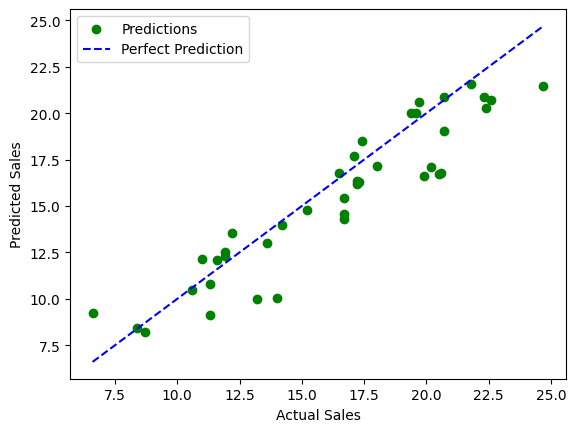

In [71]:
plt.scatter(y_test,y_pred,color='green',label='Predictions')

min_val=min(min(y_test),min(y_pred))
max_val=max(max(y_test),max(y_pred))
plt.plot([min_val,max_val],[min_val,max_val],color='blue',label='Perfect Prediction',linestyle='--')

#plot a duagonal value for reference
plt.legend()
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.show()

# **Finding Residuals and Compare**

In [73]:
residuals=y_test-y_pred #getting residuals
residuals

array([-2.64156185, -0.18863168,  0.84067712, -0.59325582,  0.23352015,
        1.01097474, -1.35593173,  1.25898357,  1.91141911,  1.42364039,
       -0.40666696, -0.8823859 ,  0.4947974 ,  3.7979927 ,  0.10210025,
        3.95482483,  1.02528039,  2.11610625,  0.84875486, -0.64217786,
       -1.1255145 , -1.14739801,  2.13093177, -0.58550321,  3.79667347,
        3.22435769, -0.43074293,  0.50358014,  1.67608869,  0.42611816,
        0.58892929,  2.18100002, -0.47692797,  3.29688828, -0.03700724,
        0.20353831,  3.23576405,  2.40857442, -0.30210584,  3.08970511])

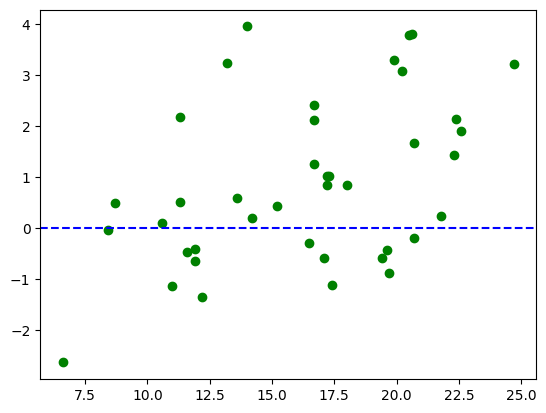

In [74]:
plt.scatter(y_test,residuals,color='green',label='Residuals')
plt.axhline(y=0,color='blue',label='Perfect Prediction',linestyle='--') #add  line to compare residuals


In [75]:
MSE=mean_squared_error(y_test,y_pred)
MSE

3.350988721329182

In [76]:
RMSE=np.sqrt(MSE)
RMSE

1.8305705999303008

In [77]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


# **Getting Predications**

In [82]:
arr=np.array([230.1,37.8,69.2]).reshape(1,3)
#we have to convert this 2D array as out data sed is 2D
#this specifies taht you want to reshape the original
#1-dementiona array into a 2-diamentional array with 1 row and 3 columns
#teh shape(1,3) means 1 row and 3 columns
#thois reshapes the array inoto 1x3 matrix(1 row and 3 colomns).or you can use(1,-1)

In [83]:
model.predict(arr)

array([21.17129883])